# Visual Analytics with Tableau

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
import folium


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Peer-graded Assignment: Customer Scatterplot

Your company has tasked you with analyzing
your customer’s purchases and how much the company is profiting from each
customer. Your task is to create a scatter plot showing Customer Sales versus Customer
Profit. 

In [2]:
df = pd.read_csv("Superstore.csv")

In [3]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,4/1/2011,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,8/1/2011,Standard Class,Texas,Paper,0.20,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,5/1/2011,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,9/1/2011,Standard Class,Illinois,Binders,0.80,1,-5,-1.55,2,4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,5/1/2011,CA-2011-112326,60540,Avery 508,Central,Home Office,9/1/2011,Standard Class,Illinois,Labels,0.20,1,4,0.36,3,12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,5/1/2011,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,9/1/2011,Standard Class,Illinois,Storage,0.20,1,-65,-0.24,3,273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,6/1/2011,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,13/1/2011,Standard Class,Pennsylvania,Art,0.20,1,5,0.25,3,20


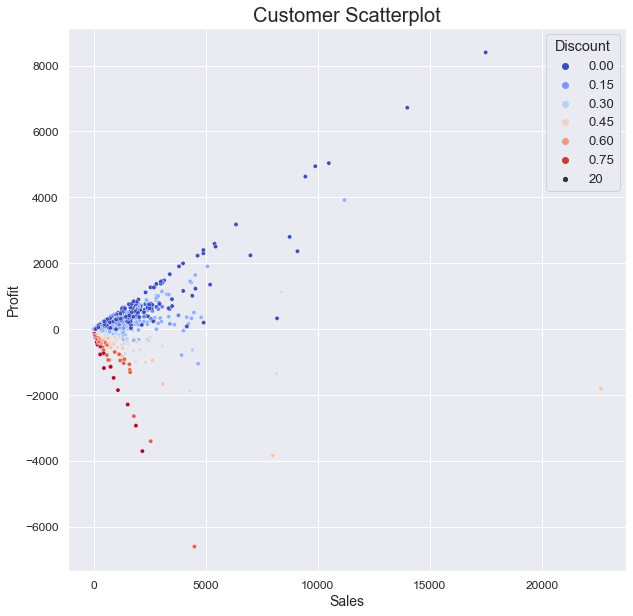

In [4]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Discount", size=20, palette="coolwarm")
plt.title("Customer Scatterplot", size=20)
plt.show()

## Peer-graded Assignment: Shipping Details

Your company has tasked you with analyzing your company’s shipping status and how many shipments are completed per week. Your task is to create a new calculation and title it “Ship Status.”  This new calculation should show whether the shipment was “Shipped on Time,” “Shipped Early,” or “Shipped Late.”

In [5]:
df = pd.read_csv("Shipping.csv", parse_dates=["Order Date"])

In [6]:
df.head()

,Order Date,Ship Mode,Number of Records,Days to Ship Actual,Days to Ship Scheduled
0,2011-04-01,Standard Class,1,4,6
1,2011-05-01,Standard Class,1,4,6
2,2011-05-01,Standard Class,1,4,6
3,2011-05-01,Standard Class,1,4,6
4,2011-06-01,Standard Class,1,7,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order Date              9994 non-null   datetime64[ns]
 1   Ship Mode               9994 non-null   object        
 2   Number of Records       9994 non-null   int64         
 3   Days to Ship Actual     9994 non-null   int64         
 4   Days to Ship Scheduled  9994 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 390.5+ KB


In [8]:
df["Year"] = df["Order Date"].dt.year

In [9]:
df["Week"] = df["Order Date"].dt.week

In [10]:
df.head()

,Order Date,Ship Mode,Number of Records,Days to Ship Actual,Days to Ship Scheduled,Year,Week
0,2011-04-01,Standard Class,1,4,6,2011,13
1,2011-05-01,Standard Class,1,4,6,2011,17
2,2011-05-01,Standard Class,1,4,6,2011,17
3,2011-05-01,Standard Class,1,4,6,2011,17
4,2011-06-01,Standard Class,1,7,6,2011,22


In [11]:
df["Diff"] = df["Days to Ship Scheduled"] - df["Days to Ship Actual"]

In [12]:
df.head()

,Order Date,Ship Mode,Number of Records,Days to Ship Actual,Days to Ship Scheduled,Year,Week,Diff
0,2011-04-01,Standard Class,1,4,6,2011,13,2
1,2011-05-01,Standard Class,1,4,6,2011,17,2
2,2011-05-01,Standard Class,1,4,6,2011,17,2
3,2011-05-01,Standard Class,1,4,6,2011,17,2
4,2011-06-01,Standard Class,1,7,6,2011,22,-1


In [13]:
# create a list of our conditions
conditions = [
    (df['Diff'] == 0),
    (df['Diff'] > 0),
    (df['Diff'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Shipped on Time', 'Shipped Early', 'Shipped Late']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Ship Status'] = np.select(conditions, values)

In [14]:
df

,Order Date,Ship Mode,Number of Records,Days to Ship Actual,Days to Ship Scheduled,Year,Week,Diff,Ship Status
0,2011-04-01,Standard Class,1,4,6,2011,13,2,Shipped Early
1,2011-05-01,Standard Class,1,4,6,2011,17,2,Shipped Early
2,2011-05-01,Standard Class,1,4,6,2011,17,2,Shipped Early
3,2011-05-01,Standard Class,1,4,6,2011,17,2,Shipped Early
4,2011-06-01,Standard Class,1,7,6,2011,22,-1,Shipped Late
...,...,...,...,...,...,...,...,...,...
9989,2014-12-31,Standard Class,1,4,6,2014,1,2,Shipped Early
9990,2014-12-31,Standard Class,1,4,6,2014,1,2,Shipped Early
9991,2014-12-31,Standard Class,1,4,6,2014,1,2,Shipped Early
9992,2014-12-31,Standard Class,1,4,6,2014,1,2,Shipped Early


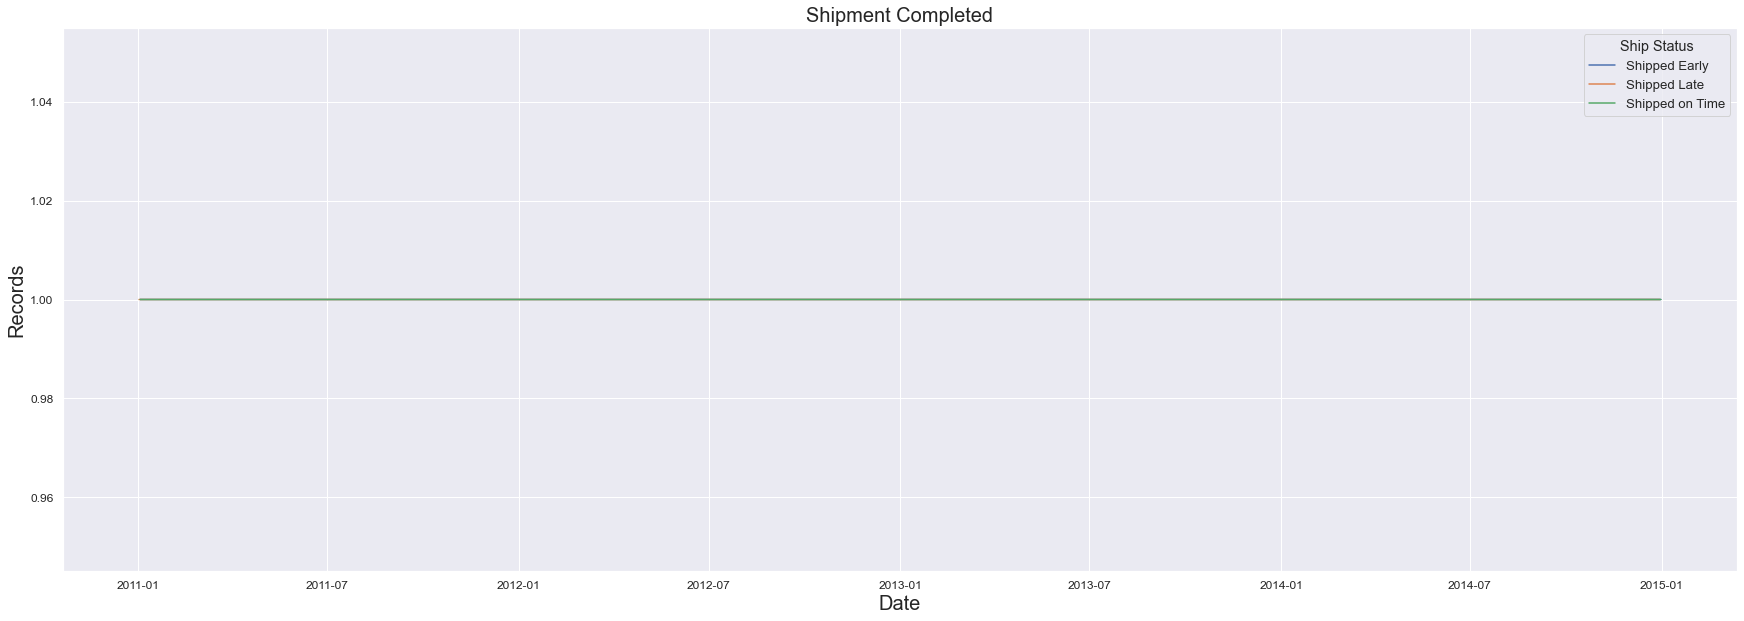

In [15]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df["Order Date"],y=df["Number of Records"], data=df, estimator=None, hue=df["Ship Status"])
plt.title("Shipment Completed", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Records", fontsize=20)
#plt.legend(['Quantity'])
plt.show()

## Peer-graded Assignment: Sales Spotlight

Spotlighting is a technique for showing discrete thresholds based on the values of a
measure. You are tasked with creating a table showing total sales by product
category, broken down by Year and Month. 

To complete this task, you will need to create a new calculation titled
“Sales Spotlight” that categorizes your total sales into “Good” if total sales
are over 10,000, and “Bad” if total sales are lower than 10,000. Furthermore,
you will need to create a Region filter, colorize your table by your new Sales
Spotlight field, and add Profit to your Tooltip. 

In [16]:
df = pd.read_csv("Sales.csv", parse_dates=["Order Date"])

In [17]:
df.head()

,Category,Order Date,Region,Profit,Quantity,Sales
0,Office Supplies,2011-04-01,Central,6,2,16
1,Office Supplies,2011-05-01,Central,-5,2,4
2,Office Supplies,2011-05-01,Central,4,3,12
3,Office Supplies,2011-05-01,Central,-65,3,273
4,Office Supplies,2011-06-01,East,5,3,20


In [18]:
df["Year"] = df["Order Date"].dt.year

In [19]:
df["Month"] = df["Order Date"].dt.month

In [20]:
df["TotalSales"] = df["Quantity"] * df["Sales"]

In [21]:
df.head()

,Category,Order Date,Region,Profit,Quantity,Sales,Year,Month,TotalSales
0,Office Supplies,2011-04-01,Central,6,2,16,2011,4,32
1,Office Supplies,2011-05-01,Central,-5,2,4,2011,5,8
2,Office Supplies,2011-05-01,Central,4,3,12,2011,5,36
3,Office Supplies,2011-05-01,Central,-65,3,273,2011,5,819
4,Office Supplies,2011-06-01,East,5,3,20,2011,6,60


In [22]:
df.describe()

,Profit,Quantity,Sales,Year,Month,TotalSales
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,28.65,3.79,229.87,2012.72,7.23,1149.55
std,234.26,2.23,623.25,1.12,3.39,3898.70
min,-6600.00,1.00,0.00,2011.00,1.00,0.00
25%,2.00,2.00,17.00,2012.00,4.00,48.00
50%,9.00,3.00,54.50,2013.00,8.00,183.50
75%,29.00,5.00,210.00,2014.00,10.00,764.25
max,8400.00,14.00,22638.00,2014.00,12.00,135828.00


In [23]:
df.groupby(["Category"])["Sales"].sum()

Category
Furniture          742006
Office Supplies    719127
Technology         836221
Name: Sales, dtype: int64

In [24]:
df.groupby(["Year"])["Sales"].sum()

Year
2011    484255
2012    470560
2013    608523
2014    734016
Name: Sales, dtype: int64

In [25]:
df.groupby(["Month"])["Sales"].sum()

Month
1     137611
2     120385
3     237494
4     154318
5     175246
6     146114
7     149374
8     207783
9     266134
10    177769
11    271481
12    253645
Name: Sales, dtype: int64

In [26]:
table = pd.pivot_table(data=df, values="Sales", index=["Category","Year"], columns=["Month"], aggfunc='sum')

In [27]:
table

Month                    1      2      3      4      5      6      7      8      9      10     11     12
Category        Year                                                                                    
Furniture       2011  12108   1869  14411   6825   5856   7827  14525  12461  16055  13868  19453  31930
                2012  18841   8236  13655  10117  12535   8322  12468  13598  27244  10973  19924  14605
                2013  10362   7141  16895  15243  16458  18177  10087  17158  26184  10517  22016  28672
                2014  10633  19055  20259  12843  14230  13722  13497  19086  24610  20934  25667  20854
Office Supplies 2011   8450   4775   7332   8150  16590  10001  16754   8747  25695   7810  22622  14856
                2012   3275   5906  17434  12624  11070  10960   6238  12297  16807  11887  18976   9774
                2013   7426  14987  16135  16724  15565  14261  14767   8759  16873  15230  17915  24889
                2014  24535  10673  21520  14200  13124  14104  10077  32861  29485  25969  25373  24645
Technology      2011   7932   6484  33151   9425   7597   6743   8540  16902  24338  12868  20743  20562
                2012   6975   6846   9792  15313   7329   9583  10026  24200  22683   9168  11838  29041
                2013   4213  19289  28442  16691  34928  12211  15604  19156  12454   9237  33060  20797
                2014  22861  15124  38468  16163  19964  20203  16791  22558  23706  29308  33894  13020

## Peer-graded Assignment: Dual Layer Maps

Your company has tasked you with creating a dual layer map.  The map should show total profit by postal
code, colorized by profit ratio, and sized by total sales.  Furthermore this map should also show Regions
across the United States.

In [28]:
df4 = pd.read_csv("Maps.csv", parse_dates=["Order Date"])

In [29]:
df4.head()

,Order Date,Postal Code,Region,State,Profit,Profit Ratio,Sales
0,2011-04-01,77095,Central,Texas,6,0.34,16
1,2011-05-01,60540,Central,Illinois,-5,-1.55,4
2,2011-05-01,60540,Central,Illinois,4,0.36,12
3,2011-05-01,60540,Central,Illinois,-65,-0.24,273
4,2011-06-01,19143,East,Pennsylvania,5,0.25,20


In [30]:
m = folium.Map([43, -100], zoom_start=4)
folium.Choropleth(geo_data="gz_2010_us_040_00_500k.json", 
                  data=df4,
                  columns=["State","Profit Ratio"],
                  key_on=None,
                  fill_color='YlGn',
                  fill_opacity=0.6,
                  line_opacity=0.2,
                  legend_name="Profit Ratio"
                  ).add_to(m)

m

#### Python code done by Dennis Lam